In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import csv
import requests
from bs4 import BeautifulSoup

In [2]:
# Link to Data Used = https://github.com/nytimes/covid-19-data

In [3]:
# Let's try to take out the download step by using requests

url = 'https://github.com/nytimes/covid-19-data/blob/master/us-states.csv'
page = requests.get(url)

soup = BeautifulSoup(page.content, 'html.parser')

table = soup.find("table", {"class":"js-csv-data"})

total_us_data = pd.read_html(str(table))[0]

total_us_data.drop(columns='Unnamed: 0', inplace=True)

total_us_data.to_csv('most_recent_data.csv')

In [4]:
# Always have at least one of these marked out
# total_us_data = pd.read_csv('NYT-US-Data/us-states-2020-04-27.csv')
# total_us_data = pd.read_csv('most_recent_data.csv').drop(columns='Unnamed: 0')

In [5]:
# let's give the data a look
total_us_data.head()

date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0

In [6]:
# Let's check for nulls
total_us_data.isnull().sum()

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [7]:
# Let's check on the different states
total_us_data.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

### Let's Check on and Add Some Data

In [8]:
# Date isn't DateTime Yet
total_us_data.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

In [9]:
# Fixed it
total_us_data['date'] = pd.to_datetime(total_us_data['date'])

In [10]:
# Took me a few days, but I figured out how to do pct_change with groupby
# This will show the percent change in cases by day
total_us_data['percent_change'] = total_us_data.groupby('state').cases.pct_change()
total_us_data['percent_change'].fillna(0, inplace=True)

In [11]:
# Let's add a difference column
total_us_data['change_in_cases'] = total_us_data.groupby('state')['cases'].diff()

In [12]:
# Looks good
total_us_data.head()

date       state  fips  cases  deaths  percent_change  change_in_cases
0 2020-01-21  Washington    53      1       0             0.0              NaN
1 2020-01-22  Washington    53      1       0             0.0              0.0
2 2020-01-23  Washington    53      1       0             0.0              0.0
3 2020-01-24    Illinois    17      1       0             0.0              NaN
4 2020-01-24  Washington    53      1       0             0.0              0.0

In [13]:
# Let's read this in to make the graphs easier
state_action = pd.read_csv('state_action.csv')
state_action = state_action.set_index('state')

In [14]:
# And let's convert these back to datetime
state_action.state_of_emergency = pd.to_datetime(state_action.state_of_emergency)
state_action.stay_at_home = pd.to_datetime(state_action.stay_at_home)

### Separating the Data by State

In [15]:
# Let's make a funciton to seperate these
def state_info(state):
    data = total_us_data[total_us_data.state == state]
    data.date = pd.to_datetime(data.date)
    data = data.set_index(data.date)
#     data['percent_change'] = data.cases.pct_change()
#     data.percent_change.fillna(0, inplace=True)
    return data.drop(labels='date', axis=1)

In [16]:
# Function Test
state_info('Northern Mariana Islands').head()

C:\Users\nolan\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


state  fips  cases  deaths  percent_change  \
date                                                                        
2020-03-28  Northern Mariana Islands    69      2       0             0.0   
2020-03-29  Northern Mariana Islands    69      2       0             0.0   
2020-03-30  Northern Mariana Islands    69      2       0             0.0   
2020-03-31  Northern Mariana Islands    69      2       0             0.0   
2020-04-01  Northern Mariana Islands    69      6       1             2.0   

            change_in_cases  
date                         
2020-03-28              NaN  
2020-03-29              0.0  
2020-03-30              0.0  
2020-03-31              0.0  
2020-04-01              4.0

In [17]:
# Don't know how to make a function to do this, so here we go
washington_data = state_info('Washington')
illinois_data = state_info('Illinois')
california_data = state_info('California')
arizona_data = state_info('Arizona')
massachusetts_data = state_info('Massachusetts')
wisconsin_data = state_info('Wisconsin')
texas_data = state_info('Texas')
nebraska_data = state_info('Nebraska')
utah_data = state_info('Utah')
oregon_data = state_info('Oregon')
florida_data = state_info('Florida')
new_york_data = state_info('New York')
rhode_island_data = state_info('Rhode Island')
georgia_data = state_info('Georgia')
new_hampshire_data = state_info('New Hampshire')
north_carolina_data = state_info('North Carolina')
new_jersey_data = state_info('New Jersey')
colorado_data = state_info('Colorado')
maryland_data = state_info('Maryland')
nevada_data = state_info('Nevada')
tennessee_data = state_info('Tennessee')
hawaii_data = state_info('Hawaii')
indiana_data = state_info('Indiana')
kentucky_data = state_info('Kentucky')
minnesota_data = state_info('Minnesota')
oklahoma_data = state_info('Oklahoma')
pennsylvania_data = state_info('Pennsylvania')
south_carolina_data = state_info('South Carolina')
dc_data = state_info('District of Columbia')
kansas_data = state_info('Kansas')
missouri_data = state_info('Missouri')
vermont_data = state_info('Vermont')
virginia_data = state_info('Virginia')
connecticut_data = state_info('Connecticut')
iowa_data = state_info('Connecticut')
louisiana_data = state_info('Louisiana')
ohio_data = state_info('Ohio')
michigan_data = state_info('Michigan')
south_dakota_data = state_info('South Dakota')
arkansas_data = state_info('Arkansas')
delaware_data = state_info('Delaware')
mississippi_data = state_info('Mississippi')
new_mexico_data = state_info('New Mexico')
north_dakota_data = state_info('North Dakota')
wyoming_data = state_info('Wyoming')
alaska_data = state_info('Alaska')
maine_data = state_info('Maine')
alabama_data = state_info('Alabama')
idaho_data = state_info('Idaho')
montana_data = state_info('Montana')
puerto_rico_data = state_info('Puerto Rico')
virgin_islands_data = state_info('Virgin Islands')
guam_data = state_info('Guam')
west_virginia_data = state_info('West Virginia')
north_mariana_islands_data = state_info('Northern Mariana Islands')
american_samoa_data = state_info('American Samoa')

In [18]:
# Changing the Pandas Settings Real Quick
pd.options.display.min_rows = 50

In [19]:
pd.options.display.min_rows

50

# Function That Makes The Graphs

In [20]:
# This will be the main graph funciton
def daily_change(state, title=None, easter=None, end_of_stay_at_home=None):
    plt.figure(figsize=(16, 9))
    
    if title == None:
        plt.title(label=f"{state.state[0]} Currently Has {state.cases[-1]} Cases In Total", size=24)
    else:
        plt.title(title, size=24)
    
    plt.plot(state.change_in_cases)
    
    state_of_emergency = state_action.state_of_emergency[state.state[0]]
    stay_at_home = state_action.stay_at_home[state.state[0]]
    week = dt.timedelta(days=7)
    
    # This adds the State of Emergency Declaration Date
    if not pd.isna(state_of_emergency):
        plt.vlines(x=state_of_emergency, ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyles='solid', color='purple', label='State of Emergency Declaration')
        plt.vlines(x=state_of_emergency+week, ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyle='dashdot', color='purple', label='One Week After State of Emergency')
    
    # This add's the Stay at Home Order Date
    # The if not is to weed out states with no Stay at Home Orders
    if not pd.isna(stay_at_home):
        plt.vlines(x=state_action.stay_at_home[state.state[0]], ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyles='solid', color='green', label='Stay At Home Order Enacted')
        plt.vlines(x=state_action.stay_at_home[state.state[0]]+week, ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyle='dashdot', color='green', label='One Week After Stay At Home')
    
    # Since Georgia and Texas are lifting their Stay at Home Orders, I have ot stay adding this
    if end_of_stay_at_home != None:
        plt.vlines(x=end_of_stay_at_home, ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyles='solid', color='red', label='End of Stay At Home Order')
        plt.vlines(x=end_of_stay_at_home+week, ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyle='dashdot', color='red', label='One Week After End of Stay At Home')
    
    
    # This adds Easter's markers, so it will noramally not be used
    if easter != None:
        plt.vlines(x=dt.date(2020, 4, 12), ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyles='solid', color='gold', label='Easter Sunday')
        plt.vlines(x=dt.date(2020, 4, 19), ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyle='dashdot', color='gold', label='One Week After Easter')
    
    # This will add text at the end of the line indicating the current number of cases
    plt.text(x=state.index[-1], y=(state.change_in_cases[-1]), s=f"{int(state.change_in_cases[-1])}\nNew\nCases", fontsize=10)
    # ^ Marking this out for now because no one line of code looks good for every state ^
    
    # Hopefully this auto goes to the best corner
    plt.legend()

# Let's Make Some Depressing Graphs

## Alabama (AL)

C:\Users\nolan\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


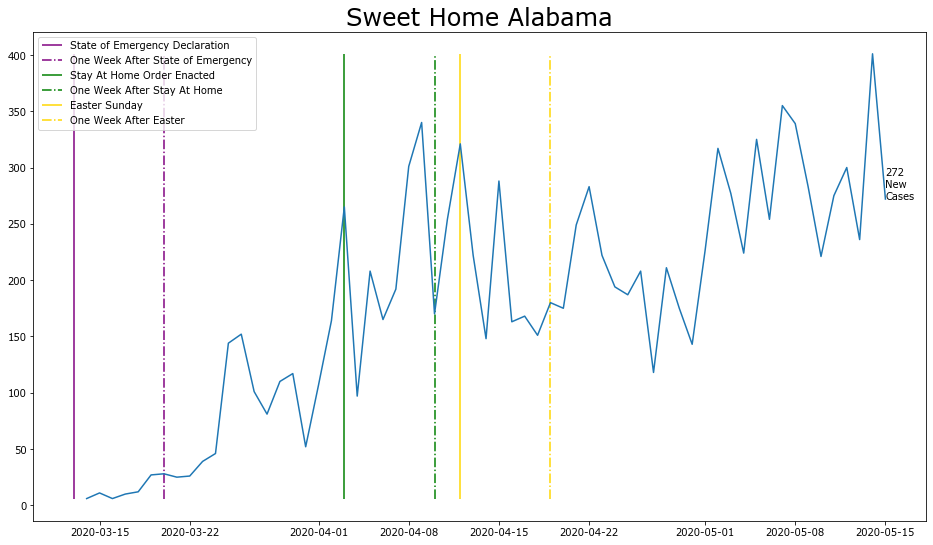

In [21]:
daily_change(alabama_data, 'Sweet Home Alabama', easter='On')

## Alaska (AK)

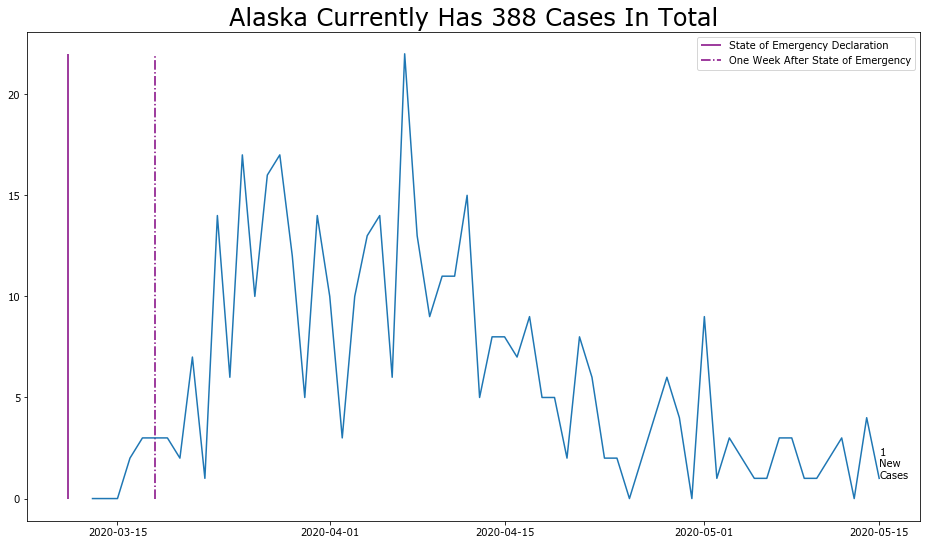

In [22]:
daily_change(alaska_data)

## American Samoa (AS)

In [23]:
# daily_change(american_samoa_data)

## Arizona (AZ)

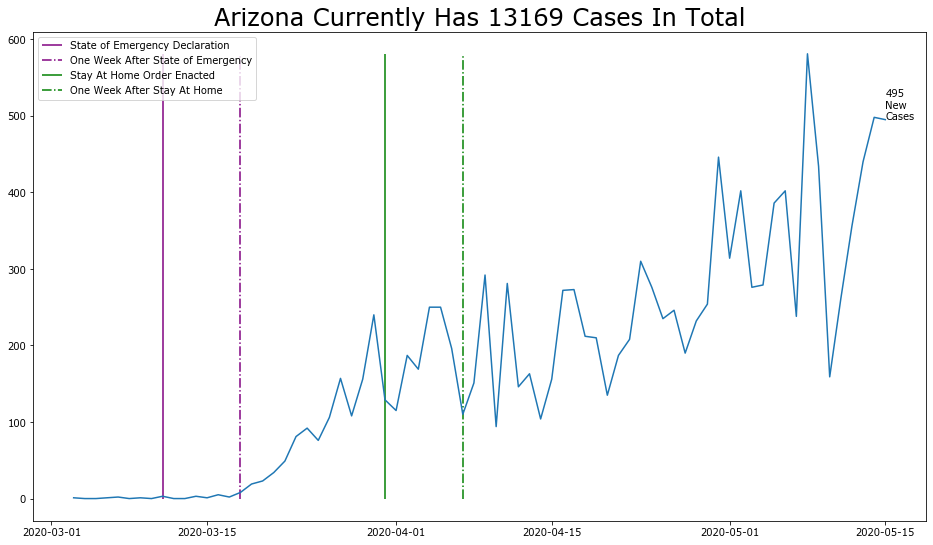

In [24]:
daily_change(arizona_data[37:])

## Arkansas (AR)

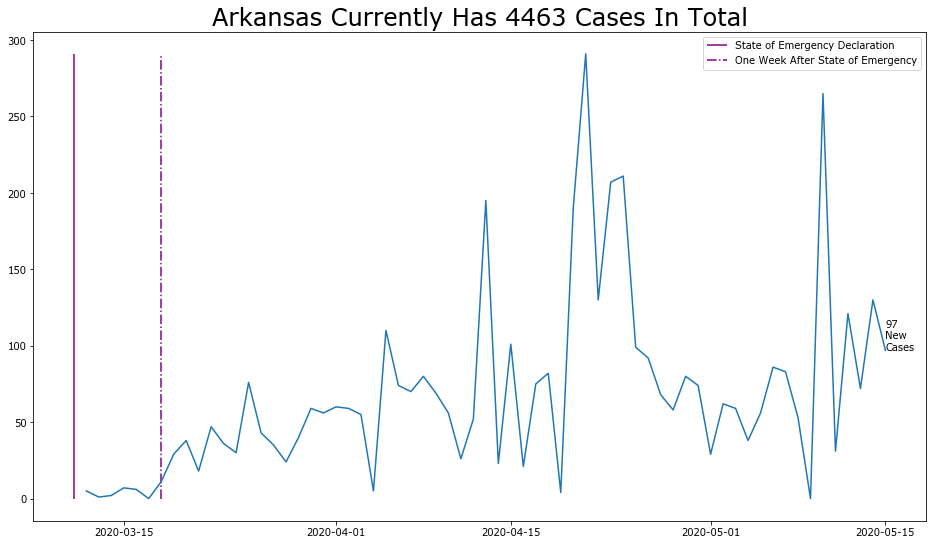

In [25]:
daily_change(arkansas_data)

## California (CA)

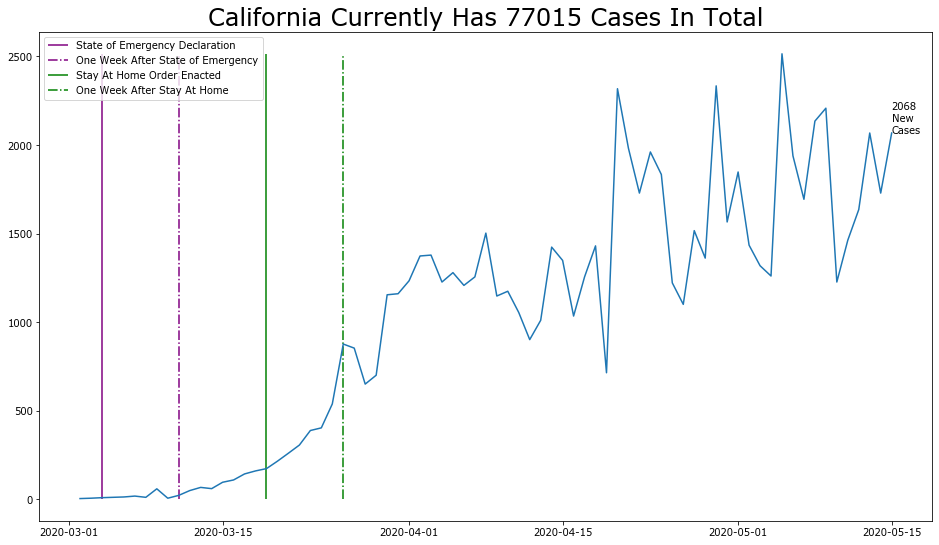

In [26]:
daily_change(california_data[37:])

## Colorado (CO)

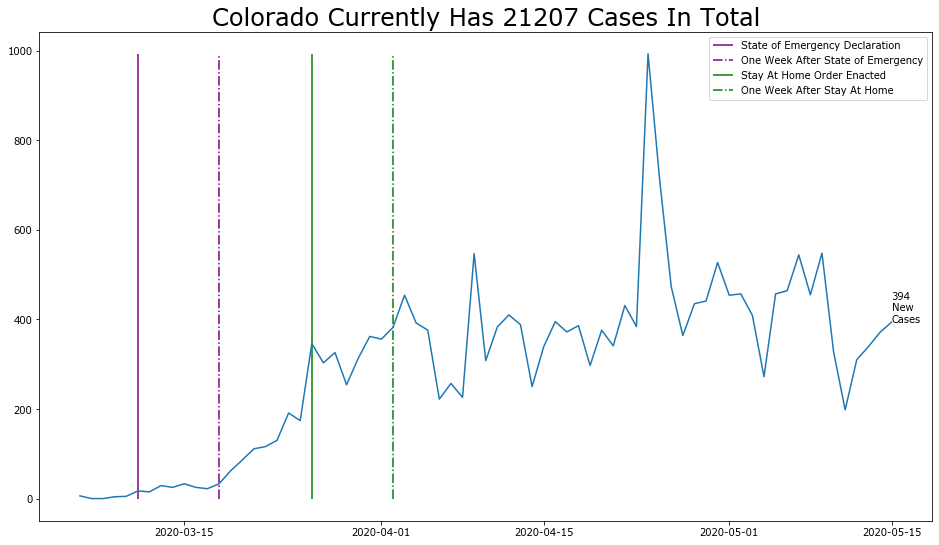

In [27]:
daily_change(colorado_data)

## Connecticut (CT)

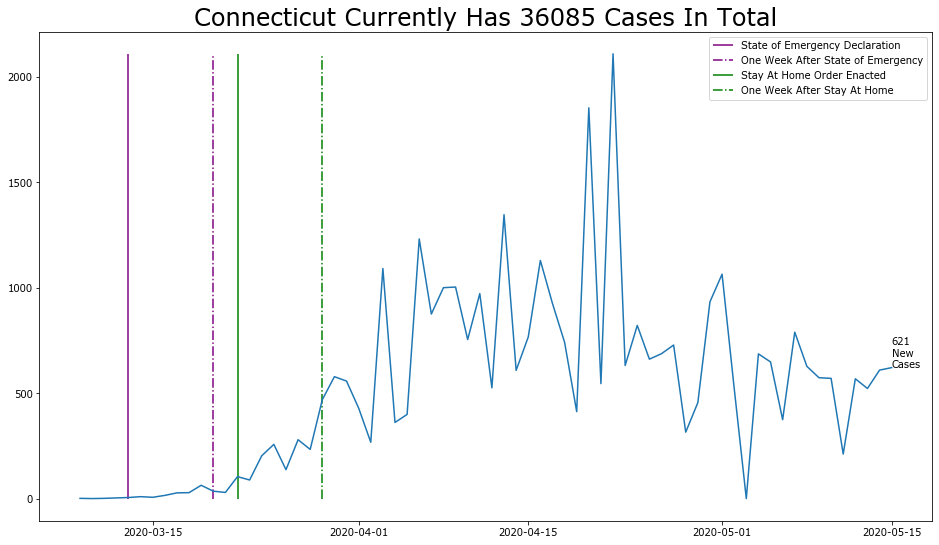

In [28]:
daily_change(connecticut_data)

## Delaware (DE)

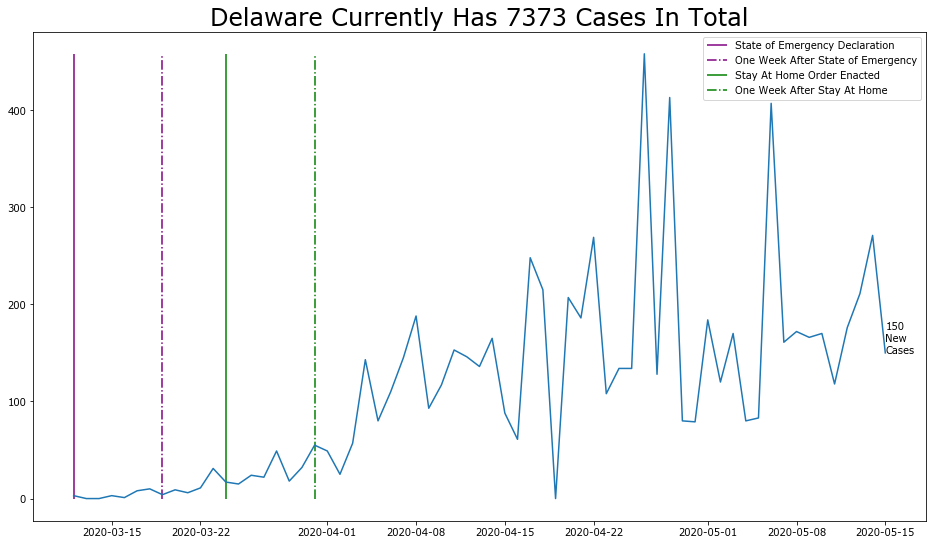

In [29]:
daily_change(delaware_data)

## District of Columbia (DC)

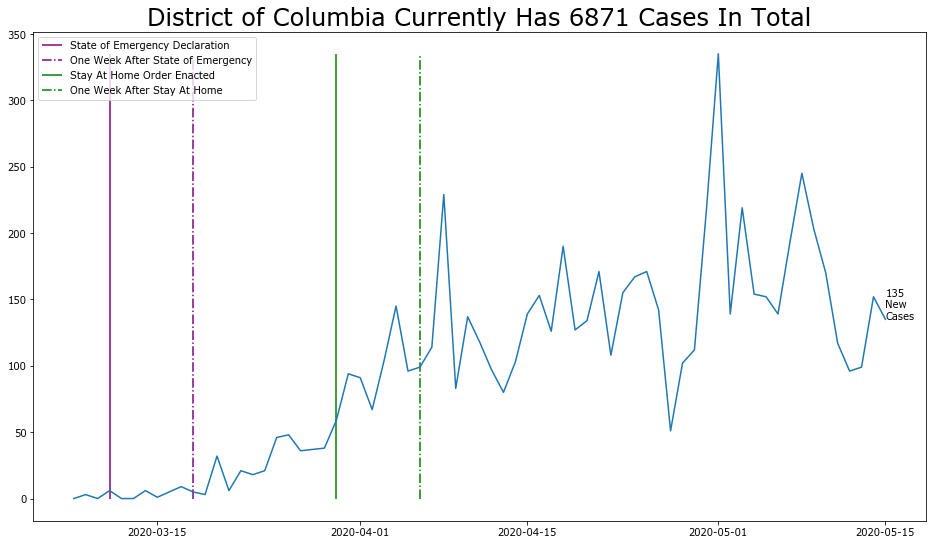

In [30]:
daily_change(dc_data)

## Florida (FL)

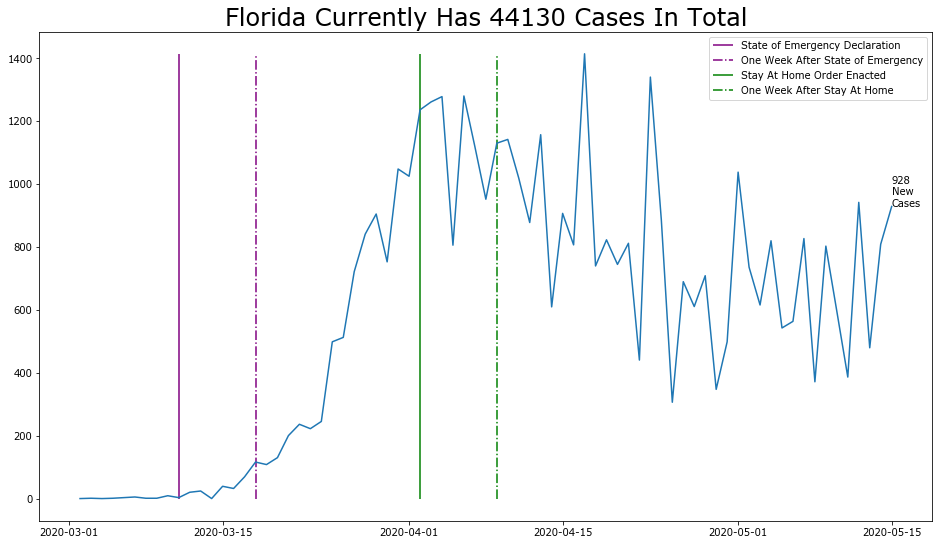

In [31]:
daily_change(florida_data)

## Georgia (GA)

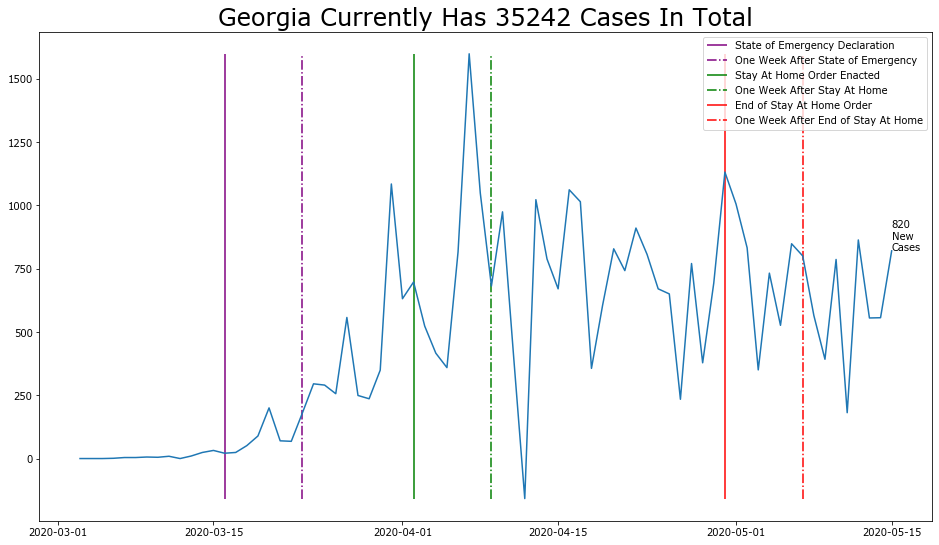

In [32]:
daily_change(georgia_data, end_of_stay_at_home=dt.date(2020, 4, 30))

# https://thehill.com/homenews/state-watch/495527-georgia-to-lift-stay-at-home-order-for-most-residents-friday

## Guam (GU)

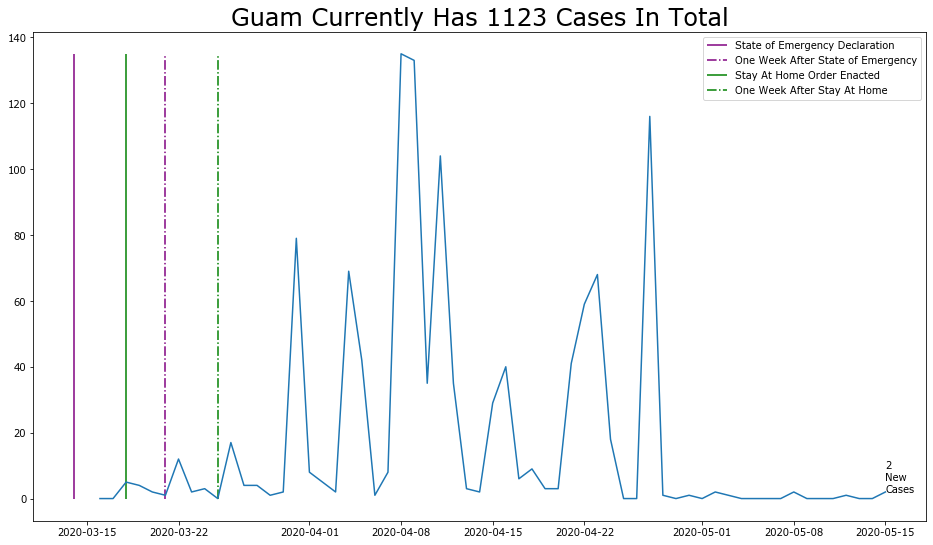

In [33]:
daily_change(guam_data)

## Hawaii (HI)

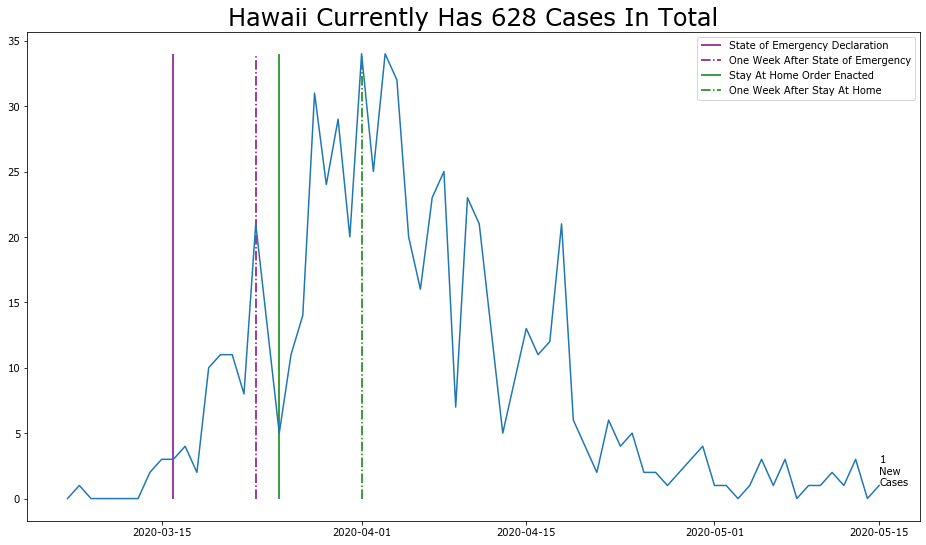

In [34]:
daily_change(hawaii_data)

## Idaho (ID)

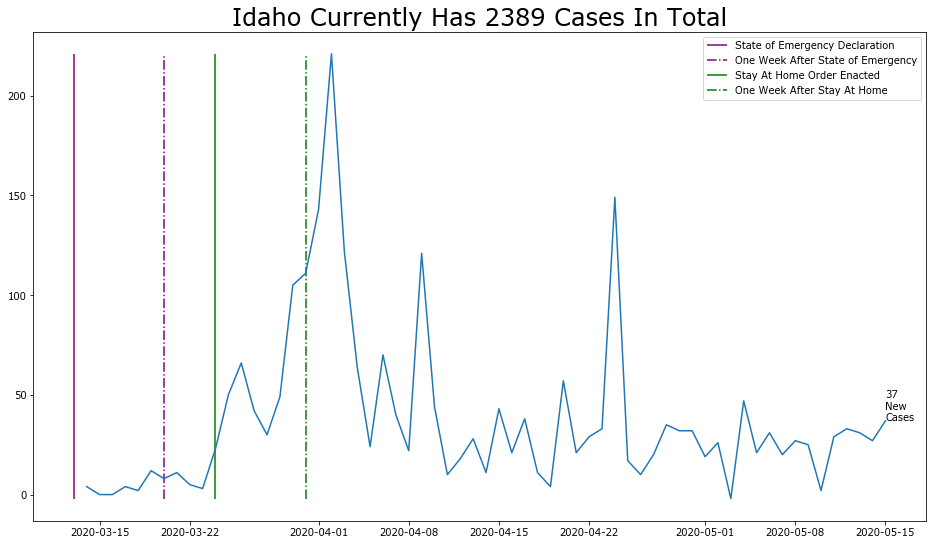

In [35]:
daily_change(idaho_data)

## Illinois (IL)

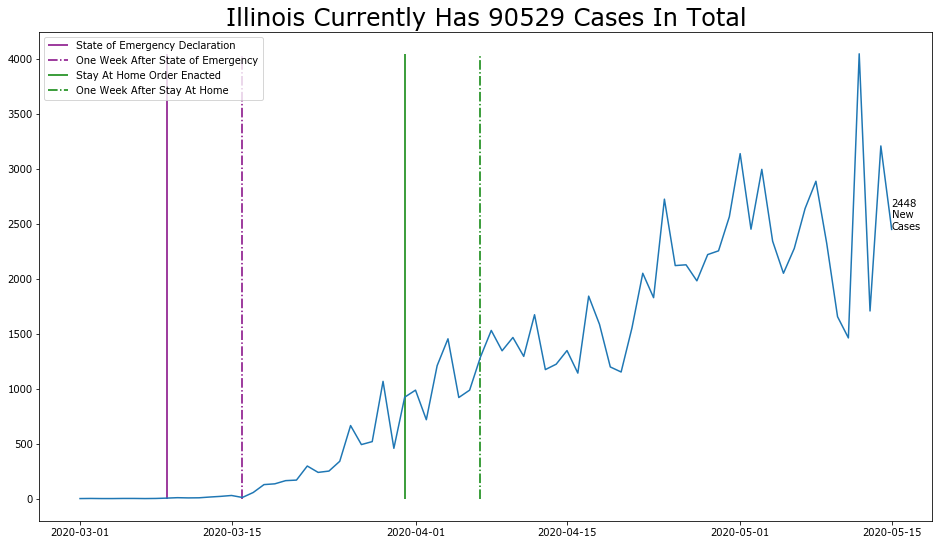

In [36]:
daily_change(illinois_data[37:])

## Indiana (IN)

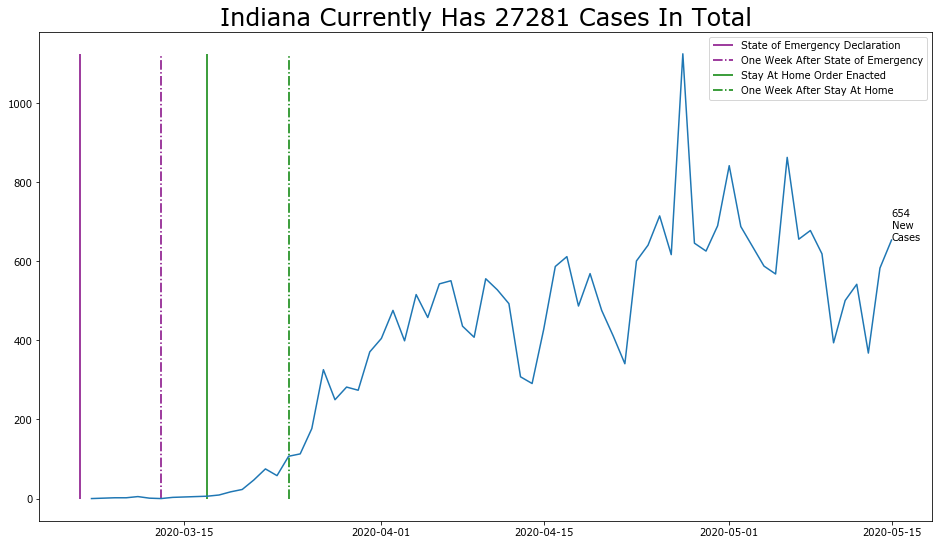

In [37]:
daily_change(indiana_data)

## Iowa (IA)

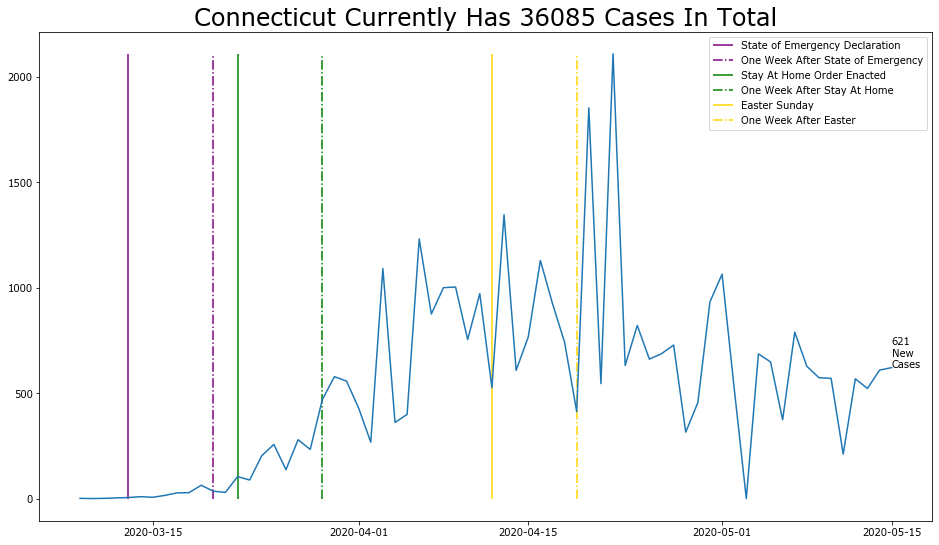

In [38]:
daily_change(iowa_data, easter="Bad")

## Kansas (KS)

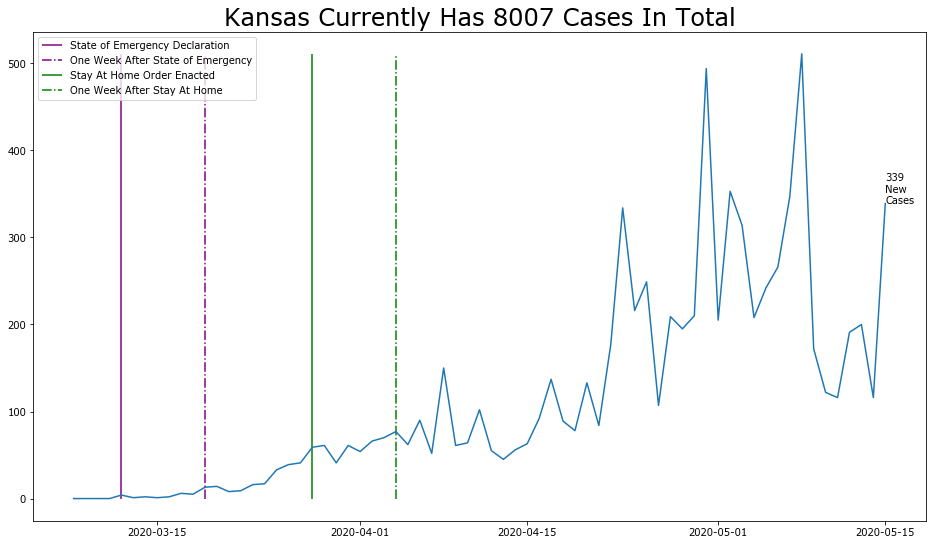

In [39]:
daily_change(kansas_data)

## Kentucky (KY)

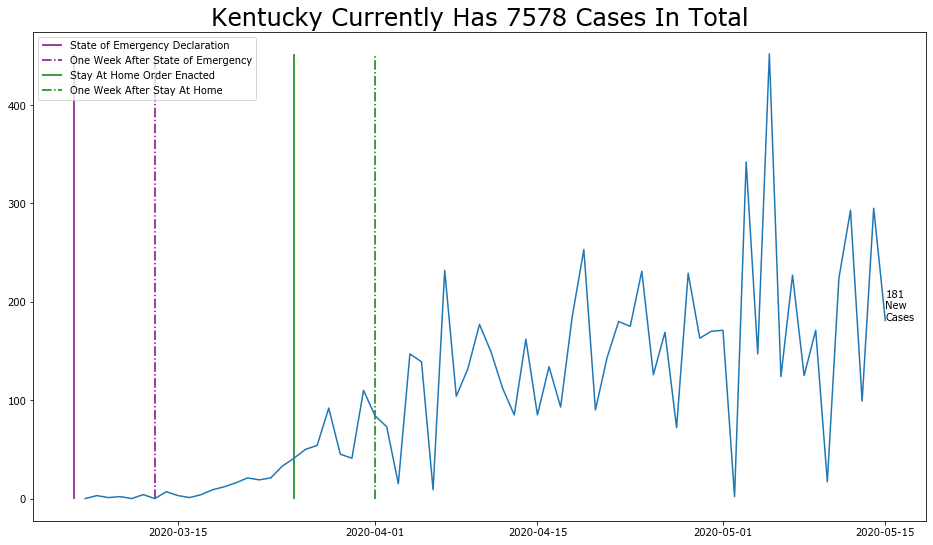

In [40]:
daily_change(kentucky_data)

## Louisiana (LA)

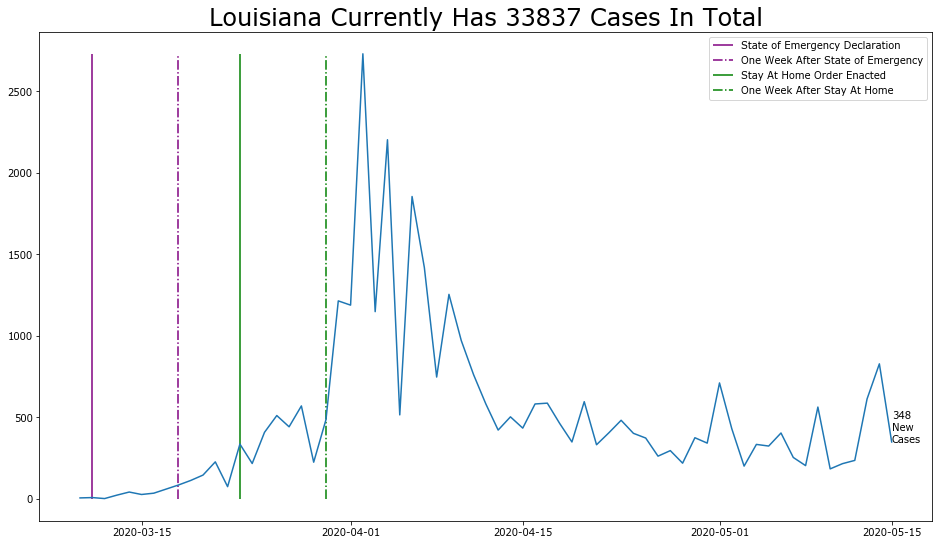

In [41]:
daily_change(louisiana_data)

## Maine (ME)

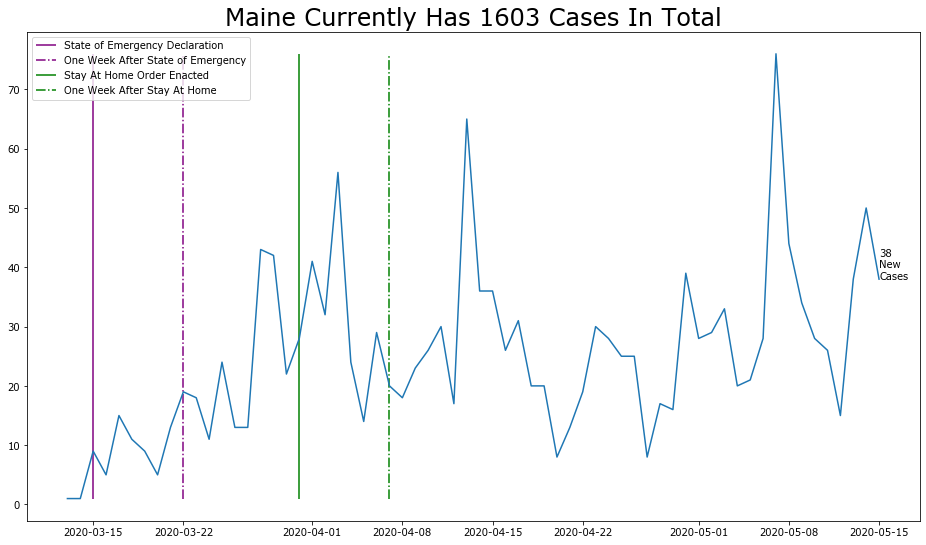

In [42]:
daily_change(maine_data)

## Maryland (MD)

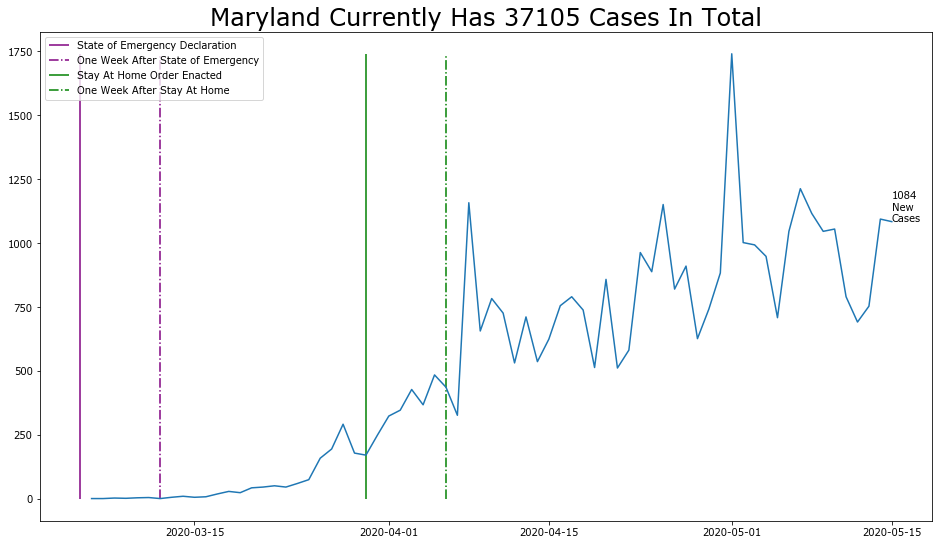

In [43]:
daily_change(maryland_data)

## Massachusetts (MA)

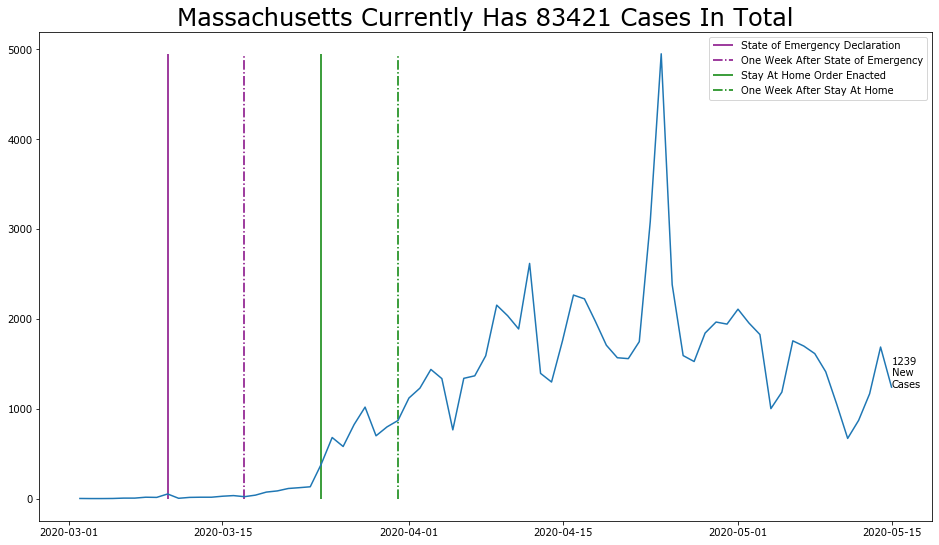

In [44]:
daily_change(massachusetts_data[30:])

# Patriots' Day is a local holiday in the state that would usually have a marathon happening during it
# plt.vlines(x=dt.date(2020, 4, 18), ymin=massachusetts_data.change_in_cases.min(), ymax=massachusetts_data.change_in_cases.max(), label="Begining of Patriots' Day Weekend", color='red')
# plt.vlines(x=dt.date(2020, 4, 25), ymin=massachusetts_data.change_in_cases.min(), ymax=massachusetts_data.change_in_cases.max(), label="One Week After Begining of Patriots' Day Weekend", color='red', linestyle='dashdot')

# plt.legend()

## Michigan (MI)

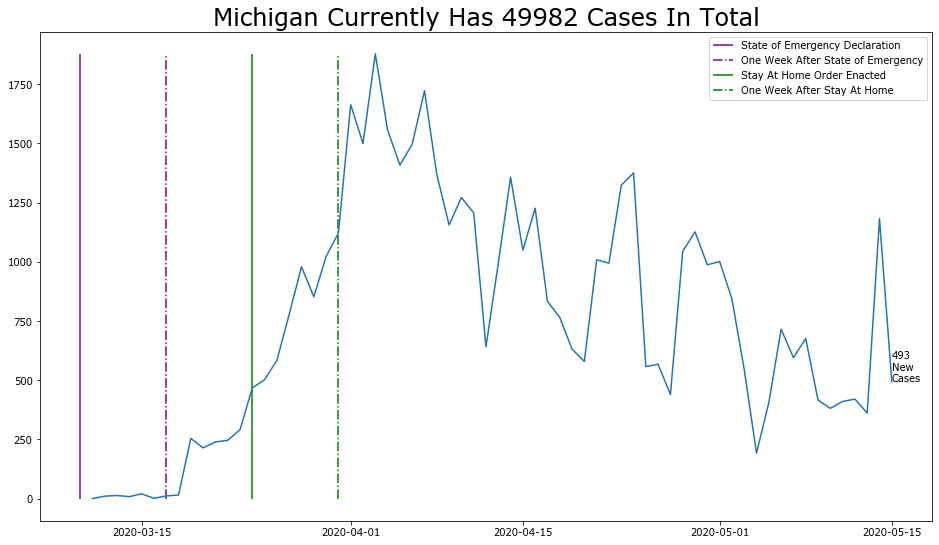

In [45]:
daily_change(michigan_data)

## Minnesota (MN)

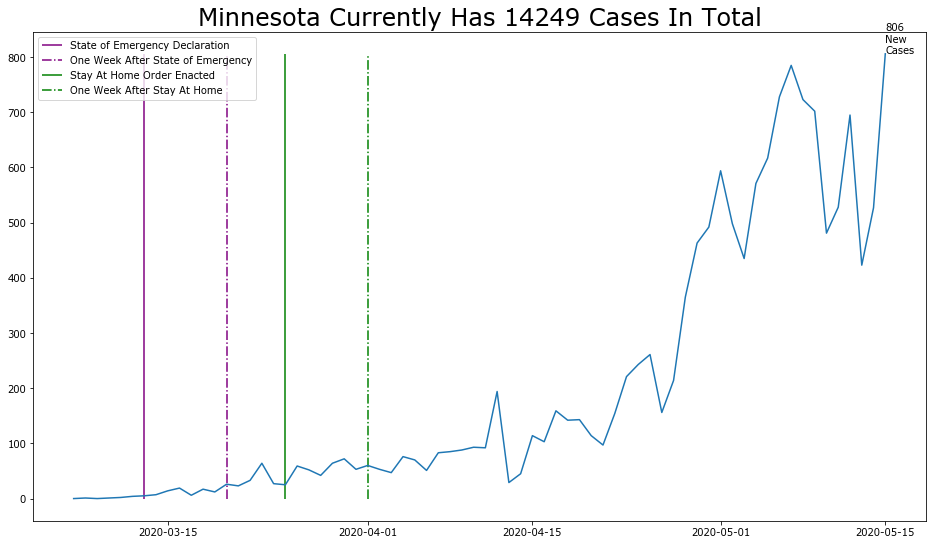

In [46]:
daily_change(minnesota_data)

## Mississippi (MS)

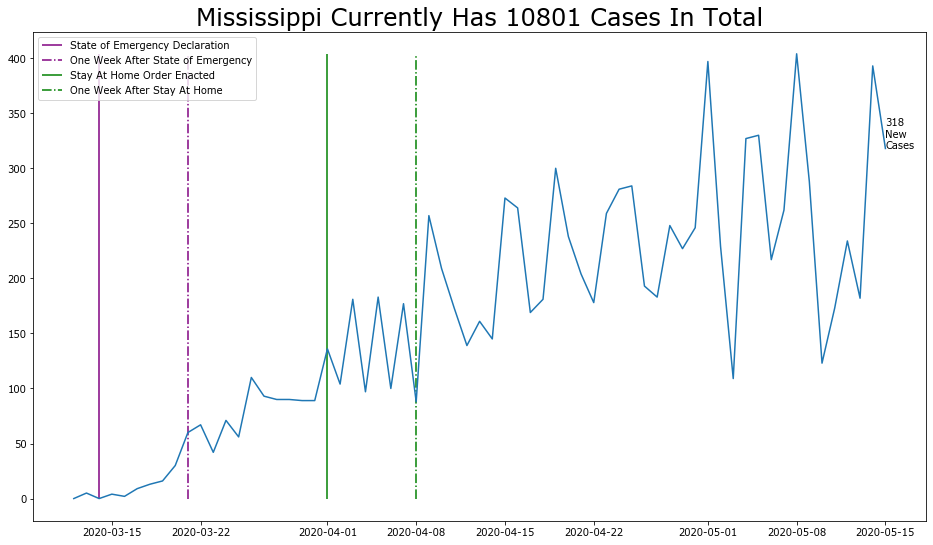

In [47]:
daily_change(mississippi_data)

## Missouri (MO)

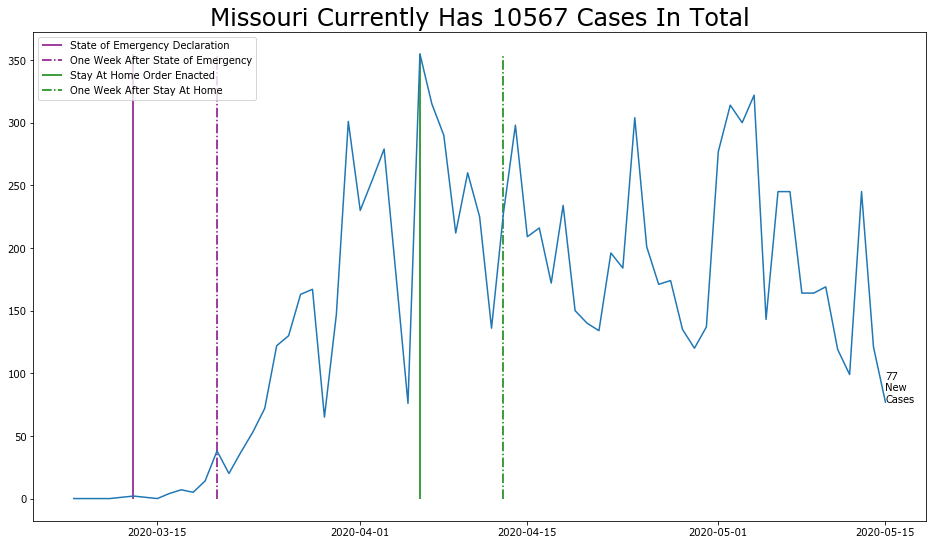

In [48]:
daily_change(missouri_data)

## Montana (MT)

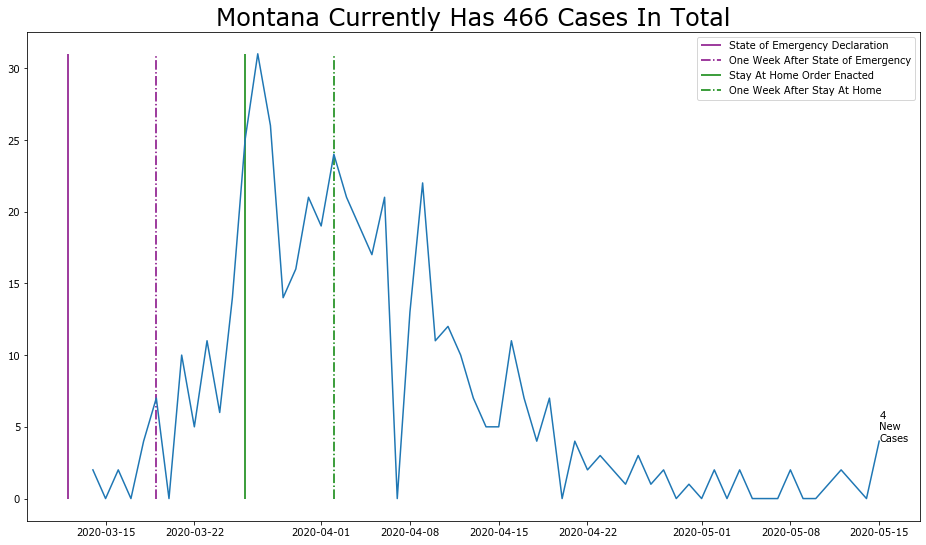

In [49]:
daily_change(montana_data)

## Nebraska (NE)

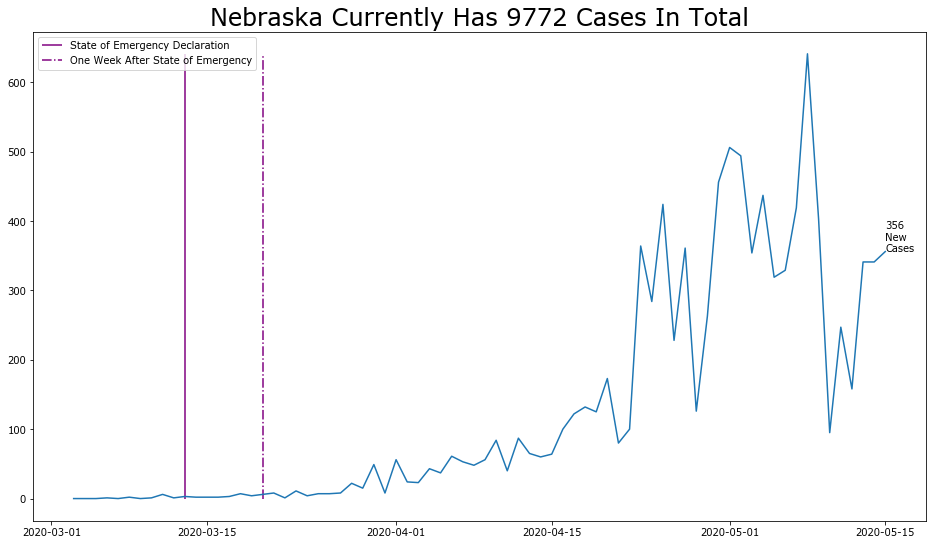

In [50]:
daily_change(nebraska_data[15:])

## Nevada (NV)

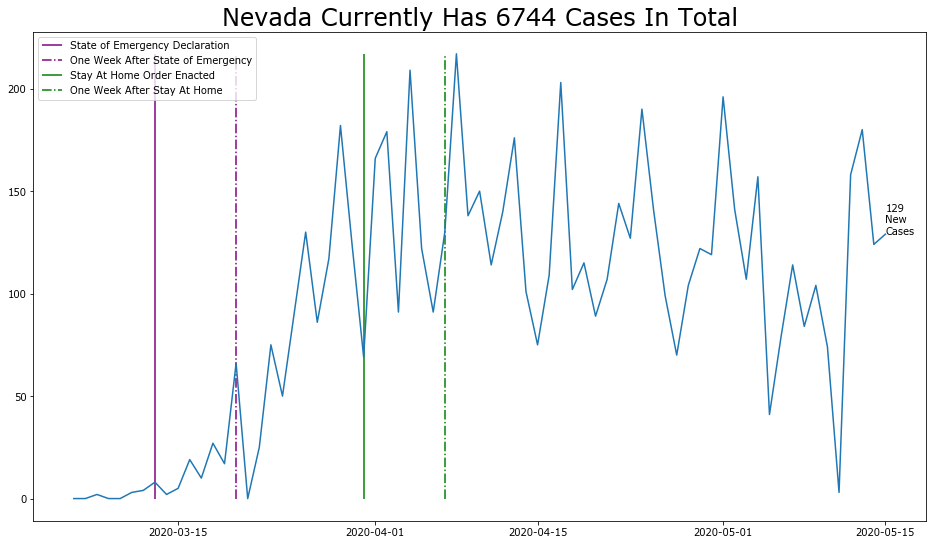

In [51]:
daily_change(nevada_data)

## New Hampshire (NH)

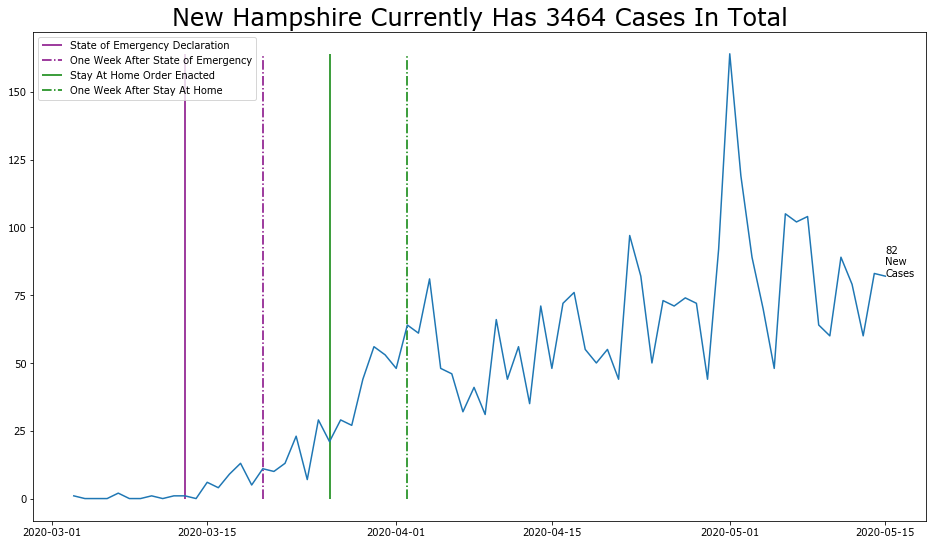

In [52]:
daily_change(new_hampshire_data)

## New Jersey (NJ)

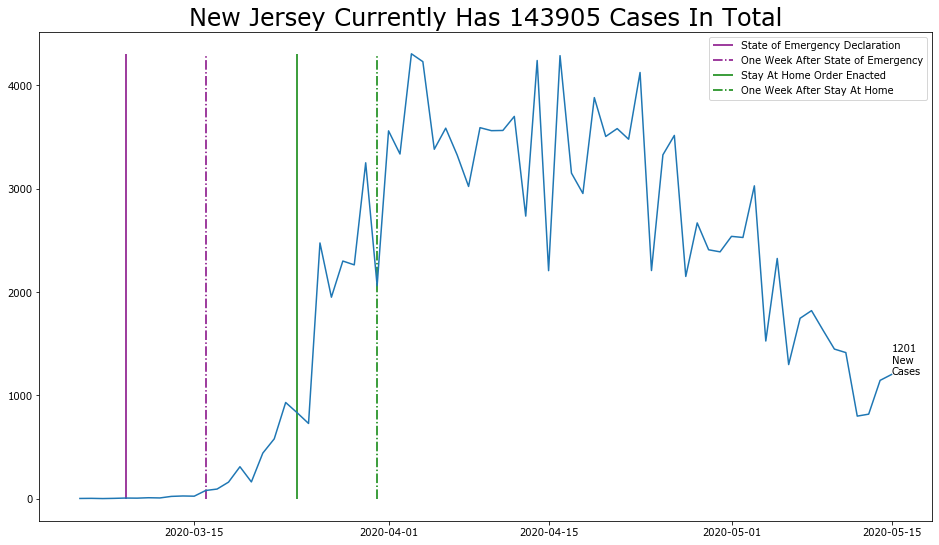

In [53]:
daily_change(new_jersey_data)

## New Mexico (NM)

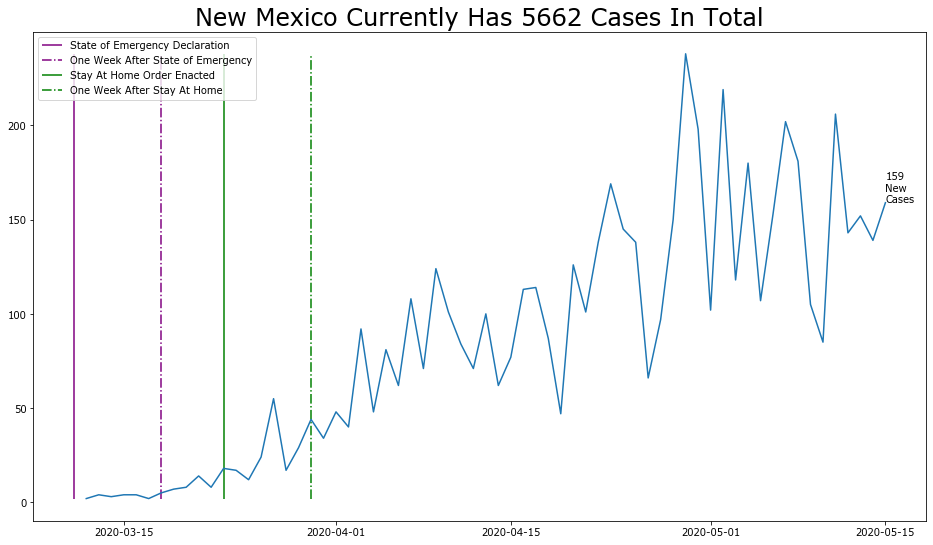

In [54]:
daily_change(new_mexico_data)

## New York (NY)

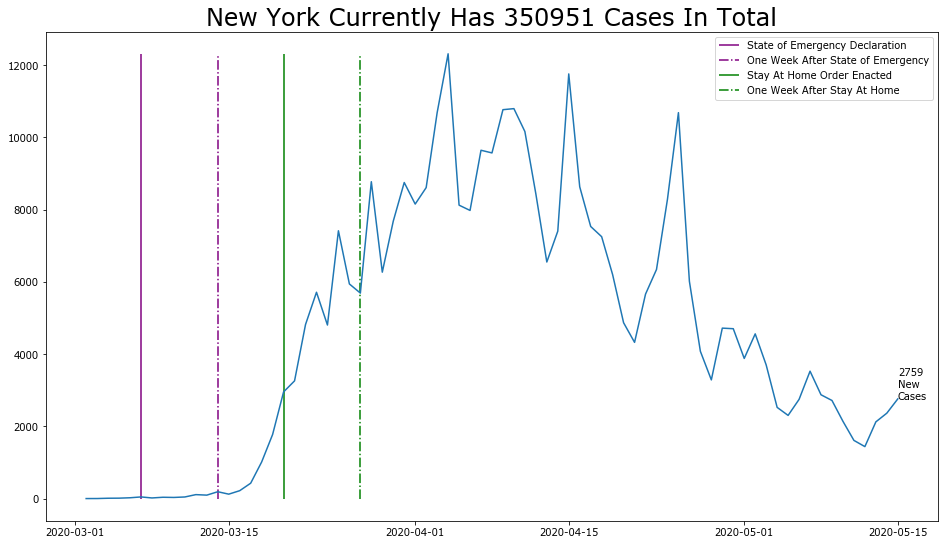

In [55]:
daily_change(new_york_data)

## North Carolina (NC)

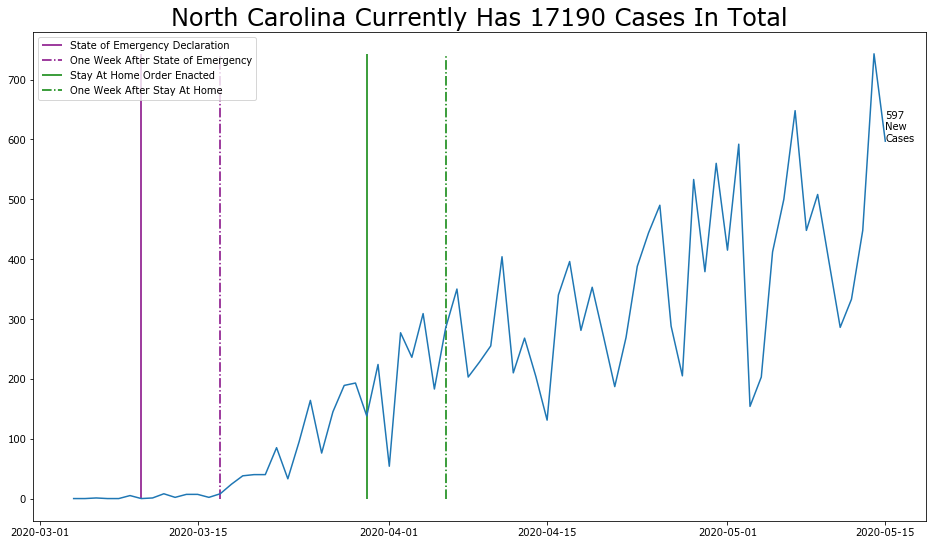

In [56]:
daily_change(north_carolina_data)

## North Dakota (ND)

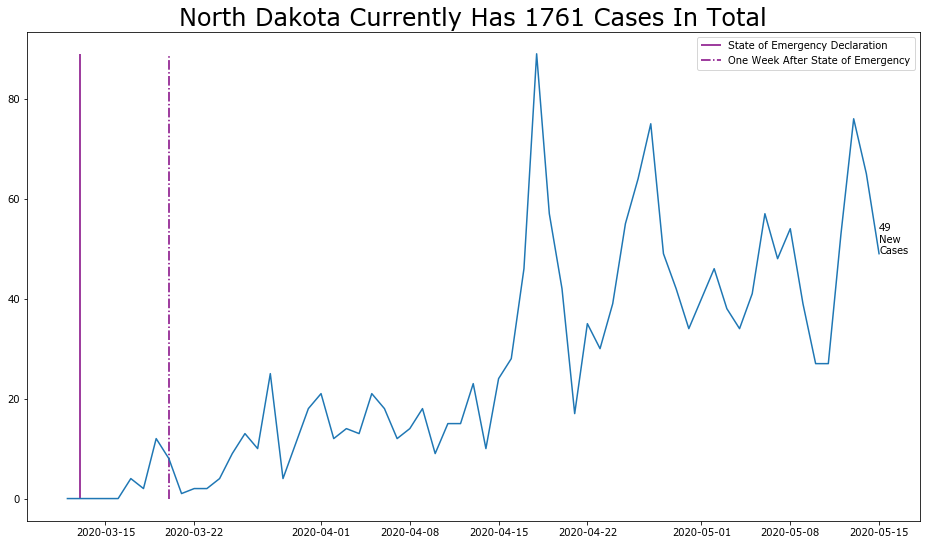

In [57]:
daily_change(north_dakota_data)

## Northern Mariana Islands (MP)

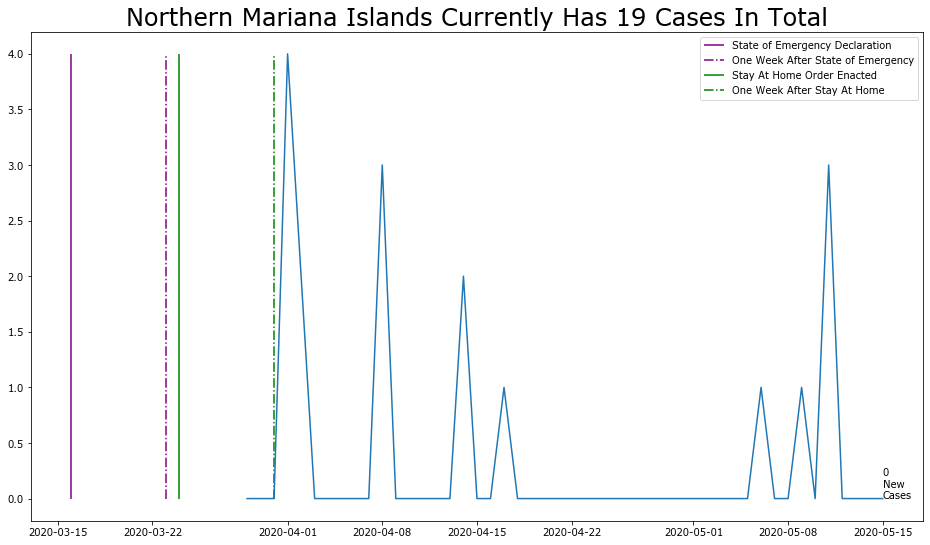

In [58]:
daily_change(north_mariana_islands_data)

## Ohio (OH)

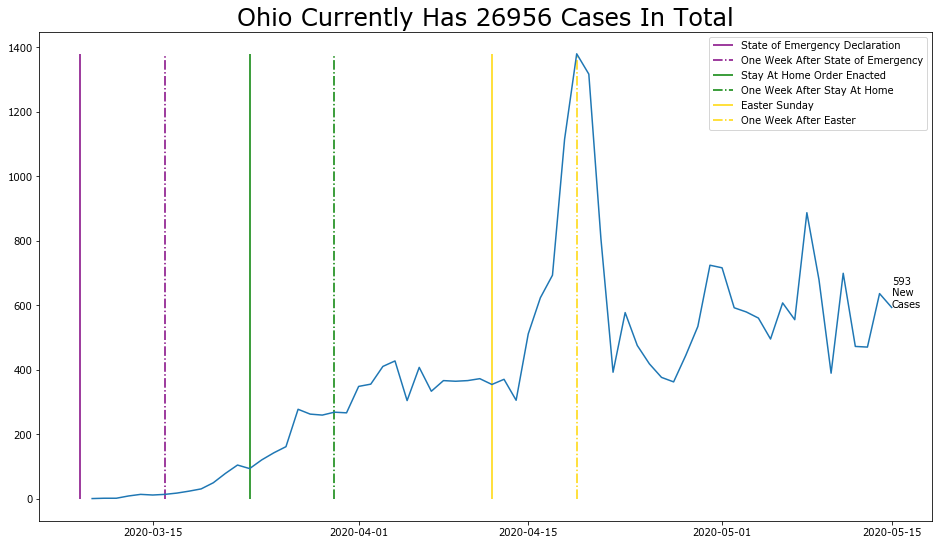

In [59]:
daily_change(ohio_data, easter='Oh Oh')

## Oklahoma (OK)

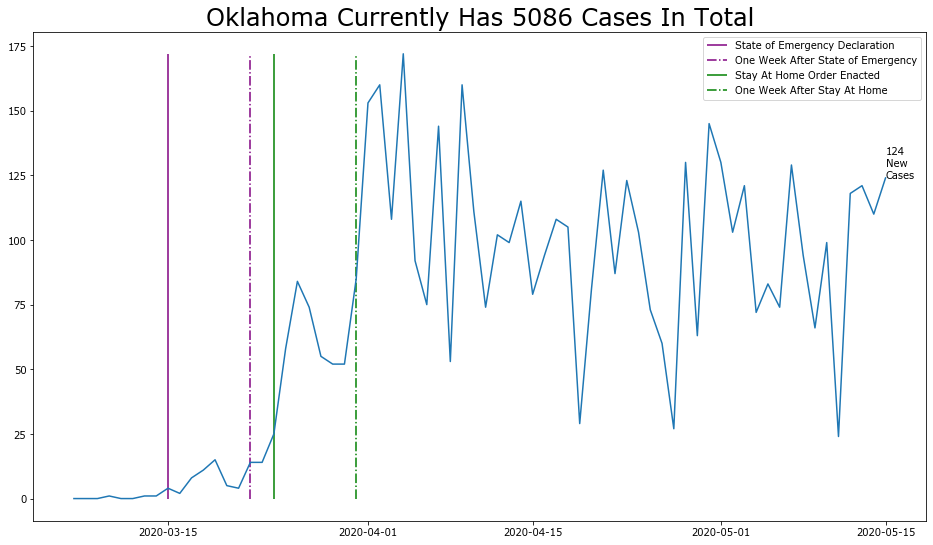

In [60]:
daily_change(oklahoma_data)

## Oregon (OR)

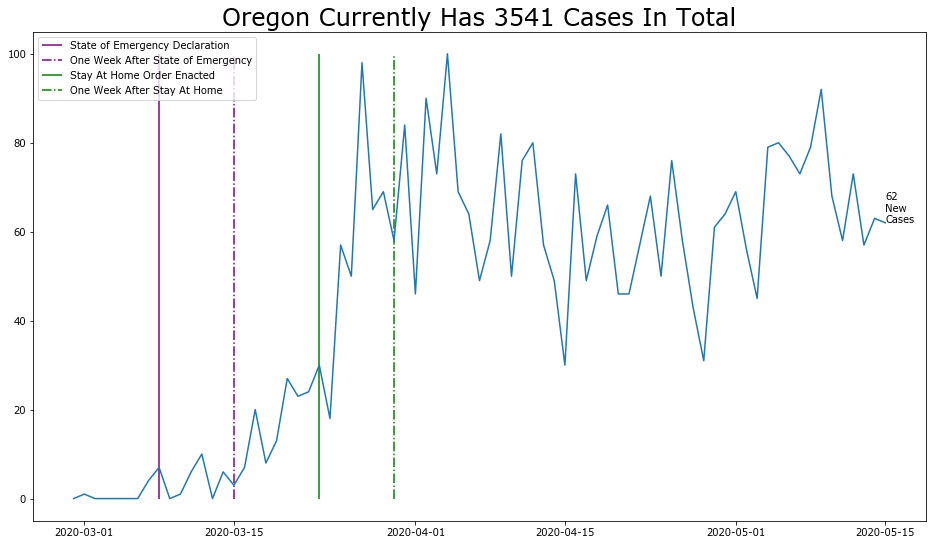

In [61]:
daily_change(oregon_data)

## Pennsylvania (PA)

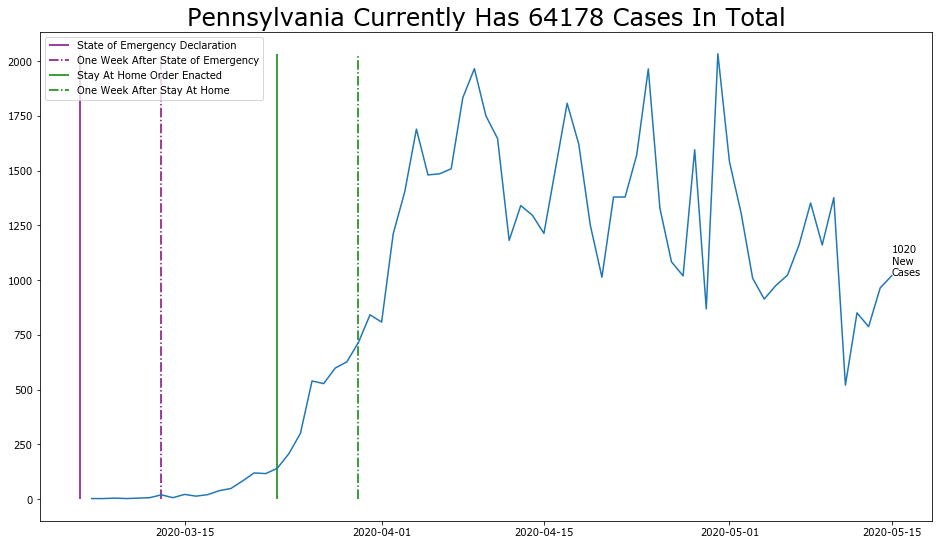

In [62]:
daily_change(pennsylvania_data)

## Puerto Rico (PR)

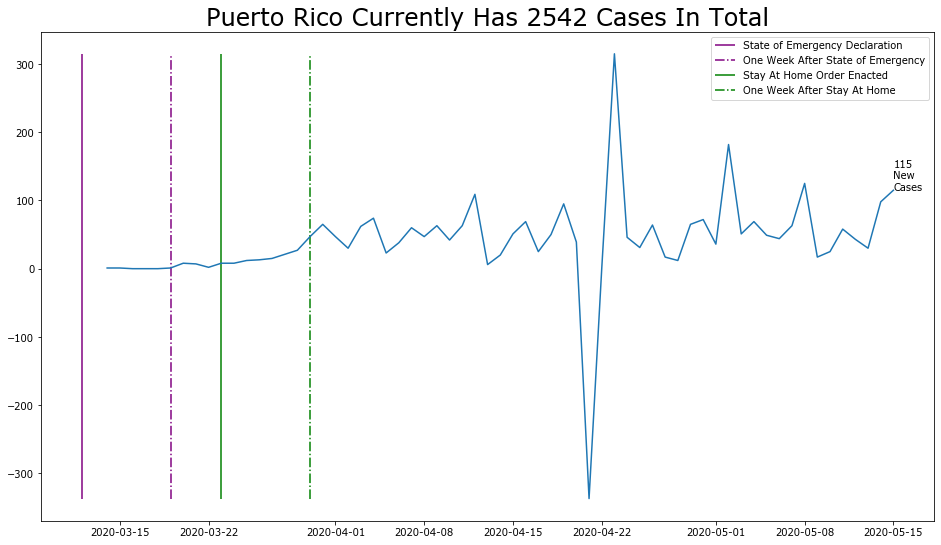

In [63]:
daily_change(puerto_rico_data)

## Rhode Island (RI)

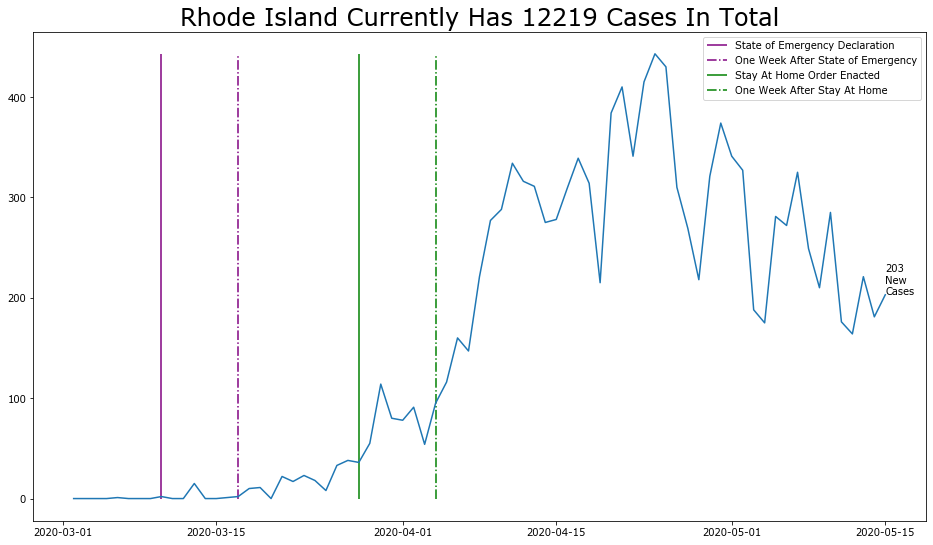

In [64]:
daily_change(rhode_island_data)

## South Carolina (SC)

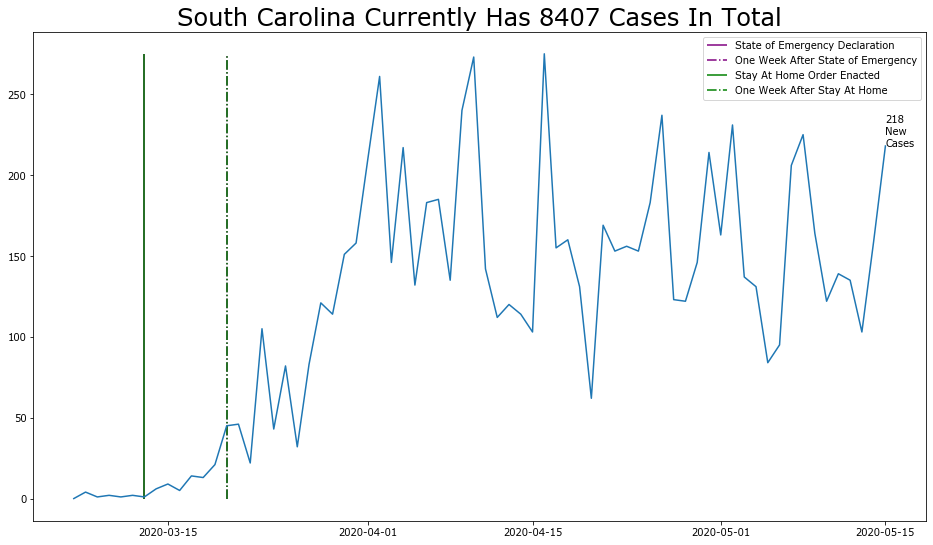

In [65]:
daily_change(south_carolina_data)

## South Dakota (SD)

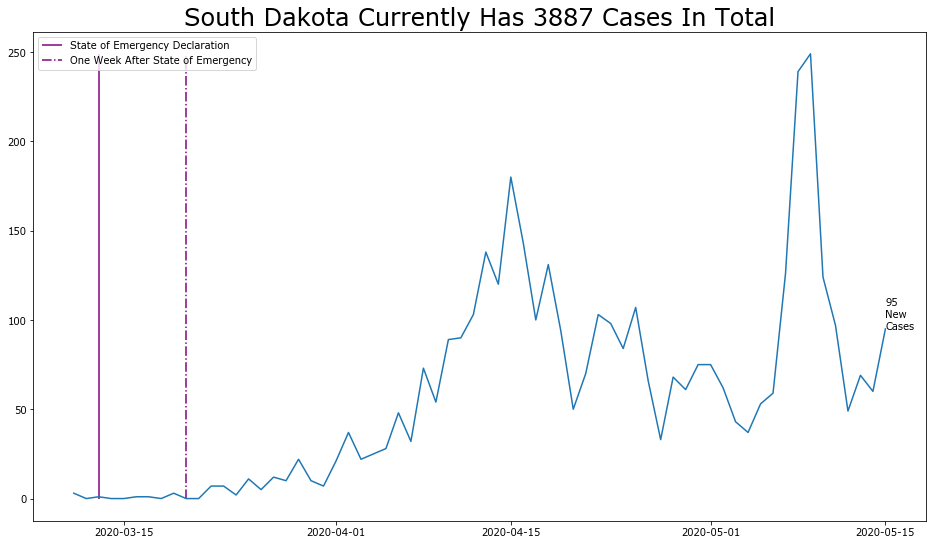

In [66]:
daily_change(south_dakota_data)

## Tennessee (TN)

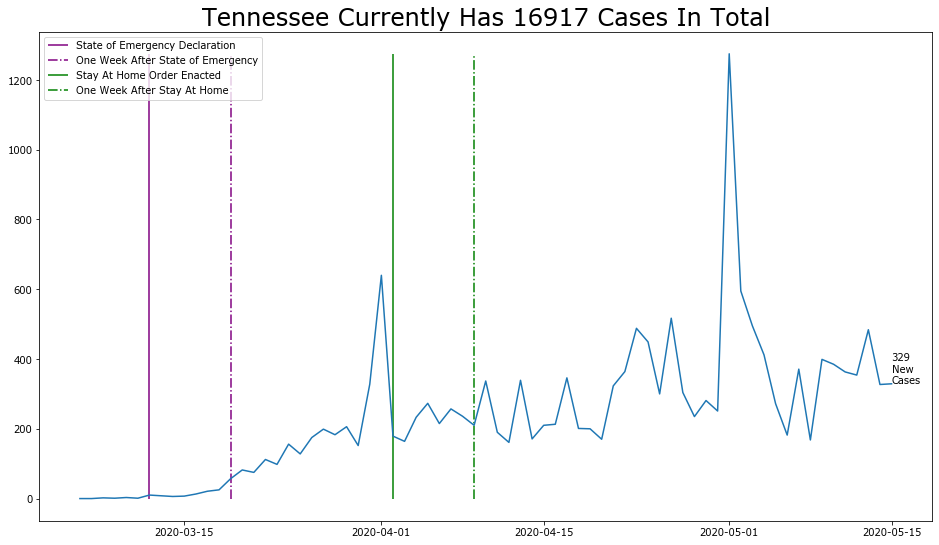

In [67]:
daily_change(tennessee_data)

## Texas (TX)

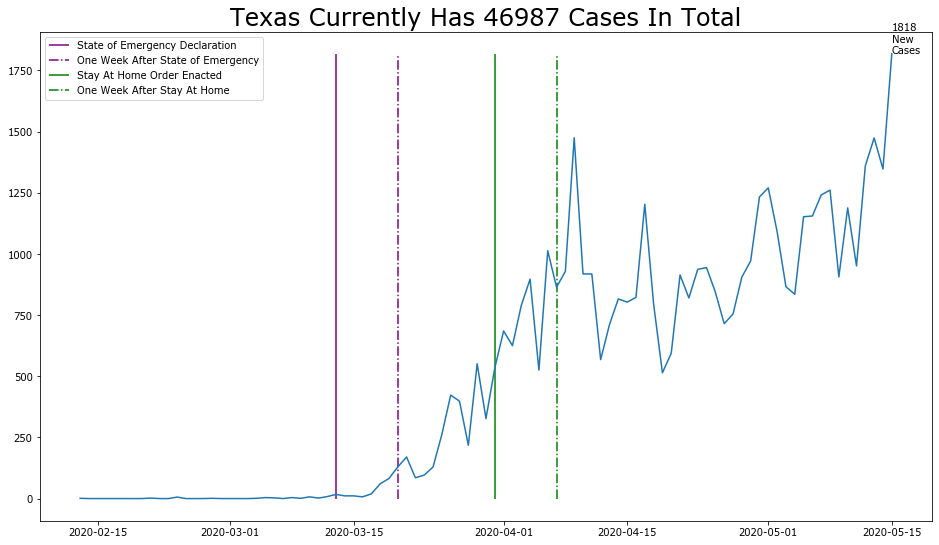

In [68]:
daily_change(texas_data)

## Utah (UT)

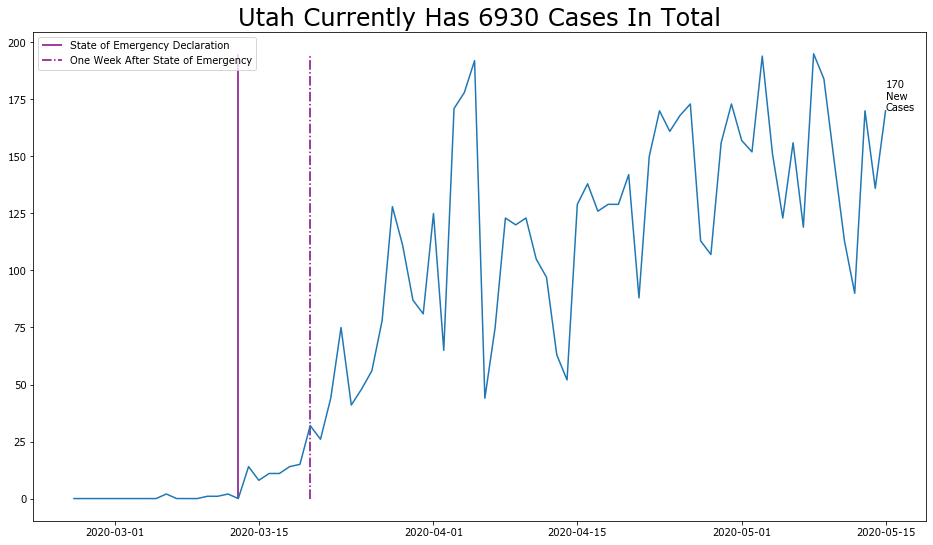

In [69]:
daily_change(utah_data)

## Vermont (VT)

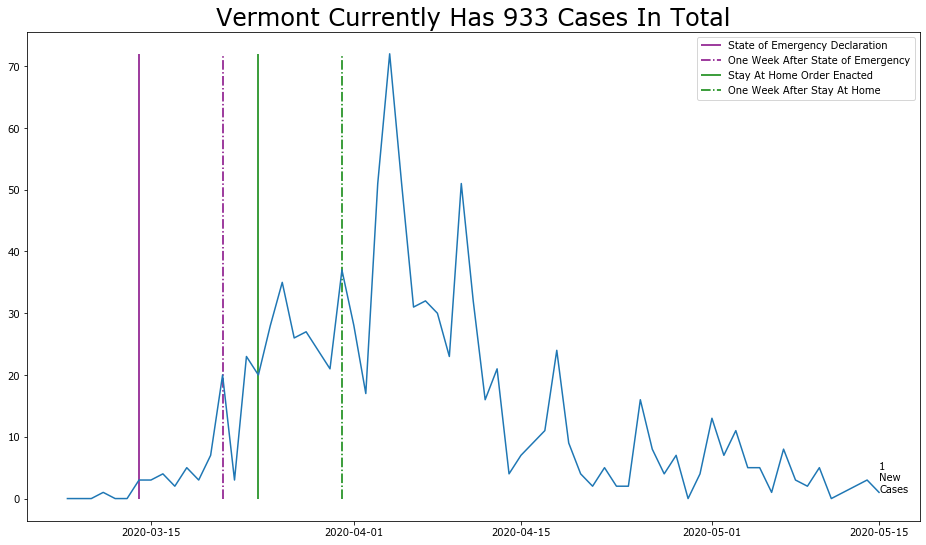

In [70]:
daily_change(vermont_data)

## Virgin Islands (VI)

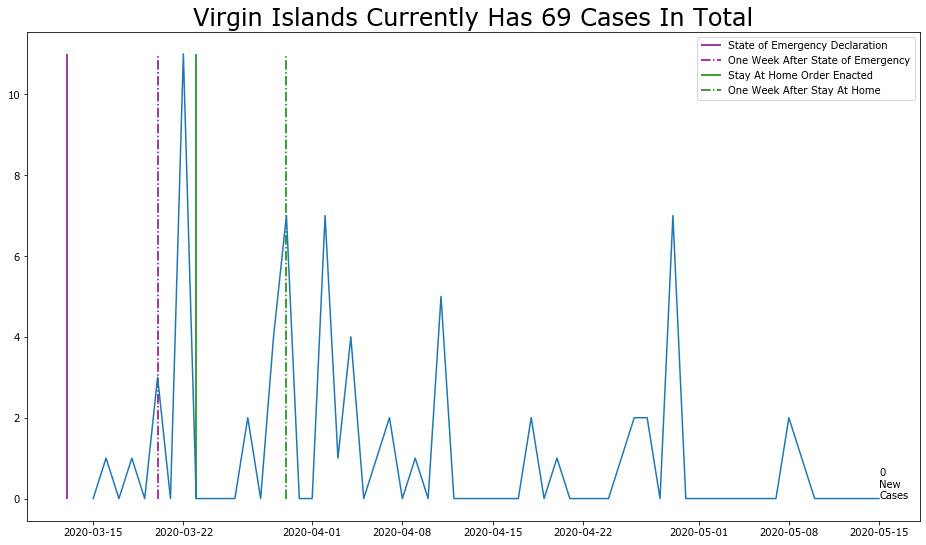

In [71]:
daily_change(virgin_islands_data)

## Virginia (VA)

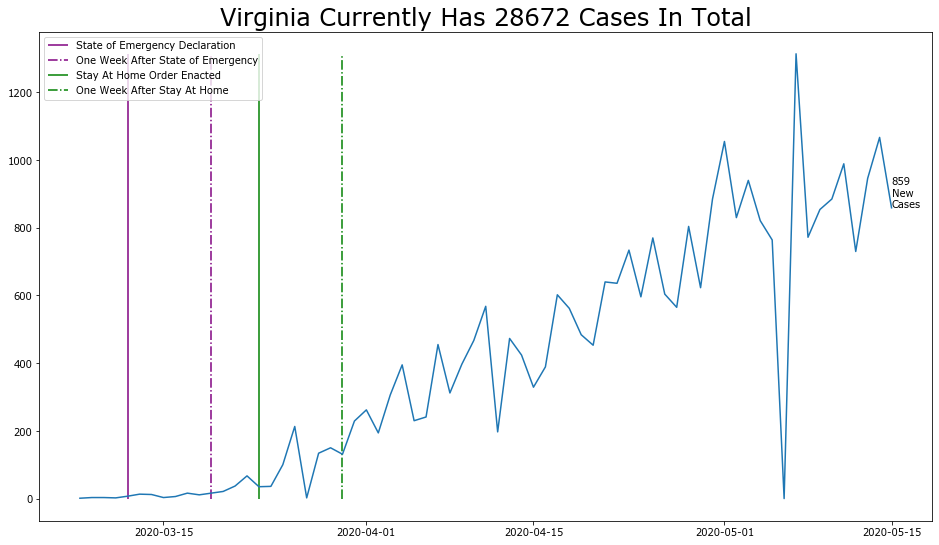

In [72]:
daily_change(virginia_data)

## Washington (WA)

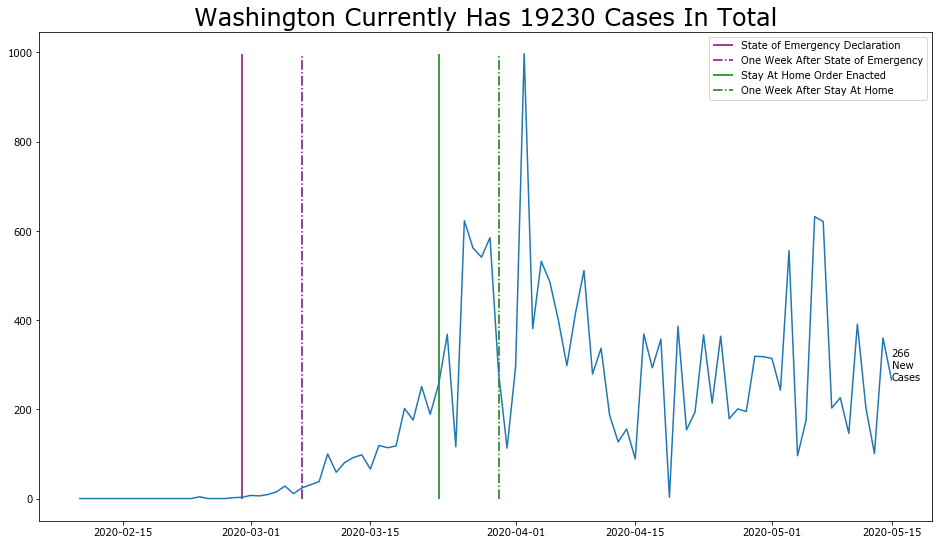

In [73]:
daily_change(washington_data[20:])

## West Virginia (WV)

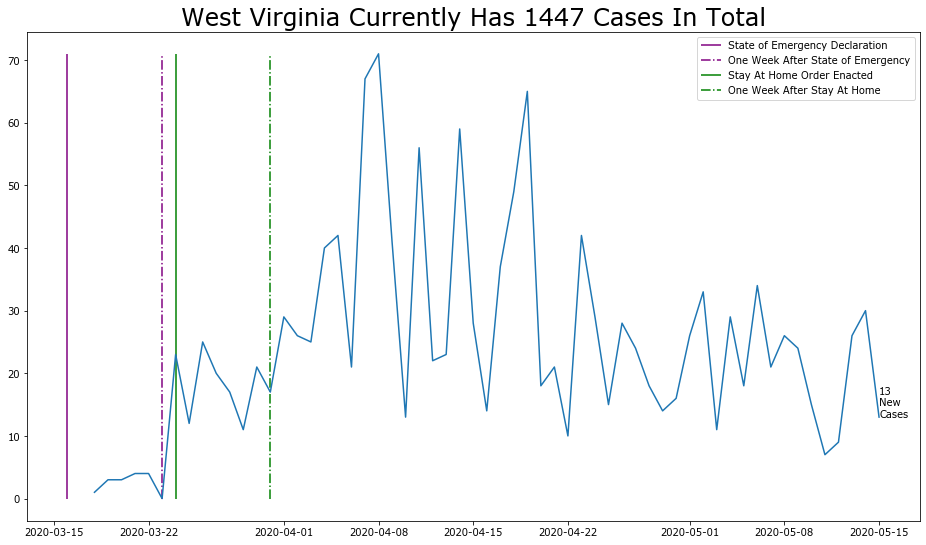

In [74]:
daily_change(west_virginia_data)

## Wisconsin (WI)

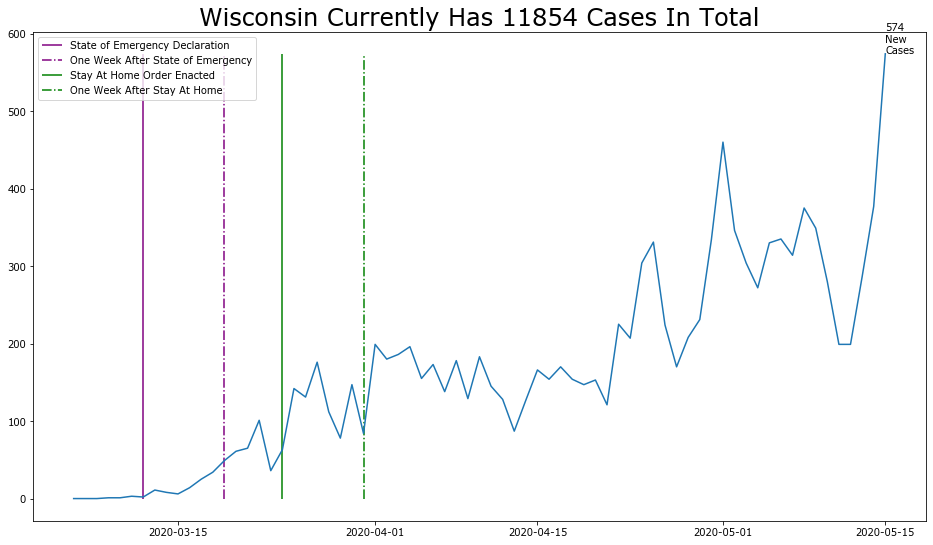

In [75]:
daily_change(wisconsin_data[30:])

## Wyoming (WY)

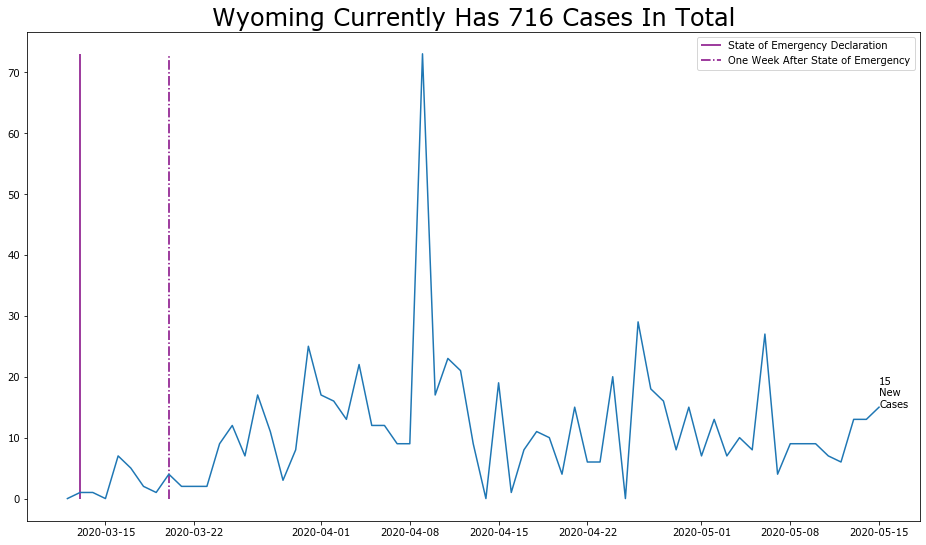

In [76]:
daily_change(wyoming_data)

In [77]:
massachusetts_data.tail(10)

state  fips  cases  deaths  percent_change  \
date                                                             
2020-05-06  Massachusetts    25  72025    4420        0.024961   
2020-05-07  Massachusetts    25  73721    4552        0.023547   
2020-05-08  Massachusetts    25  75333    4702        0.021866   
2020-05-09  Massachusetts    25  76743    4840        0.018717   
2020-05-10  Massachusetts    25  77793    4979        0.013682   
2020-05-11  Massachusetts    25  78462    5108        0.008600   
2020-05-12  Massachusetts    25  79332    5141        0.011088   
2020-05-13  Massachusetts    25  80497    5315        0.014685   
2020-05-14  Massachusetts    25  82182    5482        0.020932   
2020-05-15  Massachusetts    25  83421    5592        0.015076   

            change_in_cases  
date                         
2020-05-06           1754.0  
2020-05-07           1696.0  
2020-05-08           1612.0  
2020-05-09           1410.0  
2020-05-10           1050.0  
2020-05-11            669.0  
2020-05-12            870.0  
2020-05-13           1165.0  
2020-05-14           1685.0  
2020-05-15           1239.0

## States with Most Cases

In [78]:
total_us_data.groupby(total_us_data.state).last().sort_values(by='cases', ascending=False)

date  fips   cases  deaths  percent_change  \
state                                                                       
New York                 2020-05-15    36  350951   27755        0.007924   
New Jersey               2020-05-15    34  143905   10138        0.008416   
Illinois                 2020-05-15    17   90529    4075        0.027793   
Massachusetts            2020-05-15    25   83421    5592        0.015076   
California               2020-05-15     6   77015    3192        0.027593   
Pennsylvania             2020-05-15    42   64178    4432        0.016150   
Michigan                 2020-05-15    26   49982    4825        0.009962   
Texas                    2020-05-15    48   46987    1300        0.040249   
Florida                  2020-05-15    12   44130    1916        0.021480   
Maryland                 2020-05-15    24   37105    1911        0.030094   
Connecticut              2020-05-15     9   36085    3285        0.017511   
Georgia                  2020-05-15    13   35242    1563        0.023822   
Louisiana                2020-05-15    22   33837    2382        0.010391   
Virginia                 2020-05-15    51   28672     977        0.030885   
Indiana                  2020-05-15    18   27281    1691        0.024562   
Ohio                     2020-05-15    39   26956    1581        0.022494   
Colorado                 2020-05-15     8   21207    1150        0.018930   
Washington               2020-05-15    53   19230    1008        0.014027   
North Carolina           2020-05-15    37   17190     660        0.035979   
Tennessee                2020-05-15    47   16917     288        0.019834   
Minnesota                2020-05-15    27   14249     692        0.059957   
Iowa                     2020-05-15    19   14049     336        0.027349   
Arizona                  2020-05-15     4   13169     651        0.039056   
Rhode Island             2020-05-15    44   12219     479        0.016894   
Wisconsin                2020-05-15    55   11854     445        0.050887   
Alabama                  2020-05-15     1   11373     483        0.024502   
Mississippi              2020-05-15    28   10801     493        0.030335   
Missouri                 2020-05-15    29   10567     581        0.007340   
Nebraska                 2020-05-15    31    9772     123        0.037808   
South Carolina           2020-05-15    45    8407     380        0.026621   
Kansas                   2020-05-15    20    8007     187        0.044210   
Kentucky                 2020-05-15    21    7578     343        0.024469   
Delaware                 2020-05-15    10    7373     271        0.020767   
Utah                     2020-05-15    49    6930      77        0.025148   
District of Columbia     2020-05-15    11    6871     368        0.020042   
Nevada                   2020-05-15    32    6744     345        0.019501   
New Mexico               2020-05-15    35    5662     253        0.028893   
Oklahoma                 2020-05-15    40    5086     285        0.024990   
Arkansas                 2020-05-15     5    4463      98        0.022217   
South Dakota             2020-05-15    46    3887      44        0.025053   
Oregon                   2020-05-15    41    3541     137        0.017821   
New Hampshire            2020-05-15    33    3464     159        0.024246   
Puerto Rico              2020-05-15    72    2542     122        0.047384   
Idaho                    2020-05-15    16    2389      73        0.015731   
North Dakota             2020-05-15    38    1761      42        0.028621   
Maine                    2020-05-15    23    1603      69        0.024281   
West Virginia            2020-05-15    54    1447      64        0.009066   
Guam                     2020-05-15    66    1123       6        0.001784   
Vermont                  2020-05-15    50     933      53        0.001073   
Wyoming                  2020-05-15    56     716       7        0.021398   
Hawaii                   20

In [79]:
total_us_data[total_us_data.change_in_cases > 1000].state.value_counts()

New York         59
New Jersey       49
California       45
Massachusetts    42
Illinois         42
Pennsylvania     37
Michigan         23
Texas            15
Florida          14
Maryland         11
Connecticut       8
Louisiana         8
Georgia           8
Ohio              3
Virginia          3
Tennessee         1
Indiana           1
Name: state, dtype: int64